In [1]:
import numpy as np
import dask.array as da

## La interfaz de Dask es muy siilar a la de Numpy API
Tiene un campo especial que se llama chunks (pedazos) , que define el tamaño del chuck voy para ese array




In [2]:
np_arr = np.random.randint(20, size=20)
np_arr

array([18,  4, 16, 14, 10, 16, 15,  7,  2, 17, 10, 10,  1,  3,  4, 10, 11,
        7, 12,  5])

In [3]:
dask_arr = da.random.randint(20, size=20, chunks=5)

## Analisis del objeto
Se puede observar que todavía el objeto no se creó, para ello se requiere compute()...les suena? lazy evaluator

In [4]:
dask_arr

dask.array<randint, shape=(20,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

In [5]:
dask_arr.compute()

array([18, 13,  7,  9, 16,  0, 19, 17,  6, 17, 12,  5, 18, 12,  3,  6,  2,
        9, 19,  6])

Analisis del tamaño de los chuncks que quedan definidos


In [6]:
dask_arr.chunks

((5, 5, 5, 5),)

## Creado de array desde datos existentes

In [7]:
dask_arr_from_np = da.from_array(np_arr, chunks=5)

In [8]:
dask_arr_from_np

dask.array<array, shape=(20,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

In [9]:
dask_arr_from_np.compute()

array([18,  4, 16, 14, 10, 16, 15,  7,  2, 17, 10, 10,  1,  3,  4, 10, 11,
        7, 12,  5])

## Analisis gráfico de las operaciones

ver : http://docs.dask.org/en/latest/graphviz.html

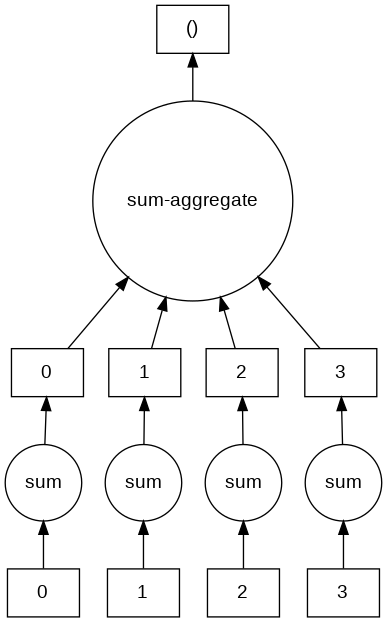

In [10]:
dask_arr_from_np.sum().visualize()

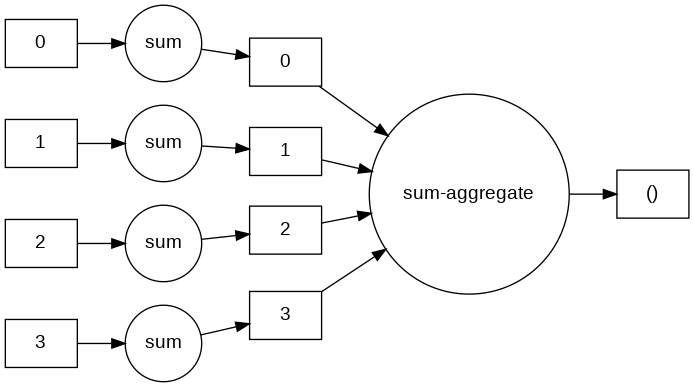

In [11]:
dask_arr_from_np.sum().visualize(rankdir="LR")

Operación vectorial, no requiere agregar toda la info

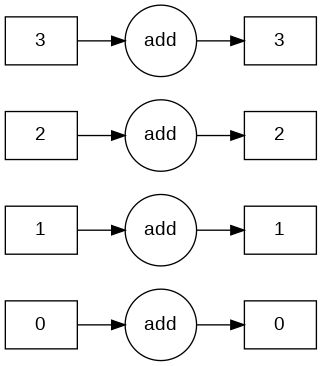

In [12]:
(dask_arr_from_np+1).visualize(rankdir="LR")

In [13]:
dask_arr_mean = da.mean(dask_arr_from_np)
dask_arr_mean.compute()

9.6

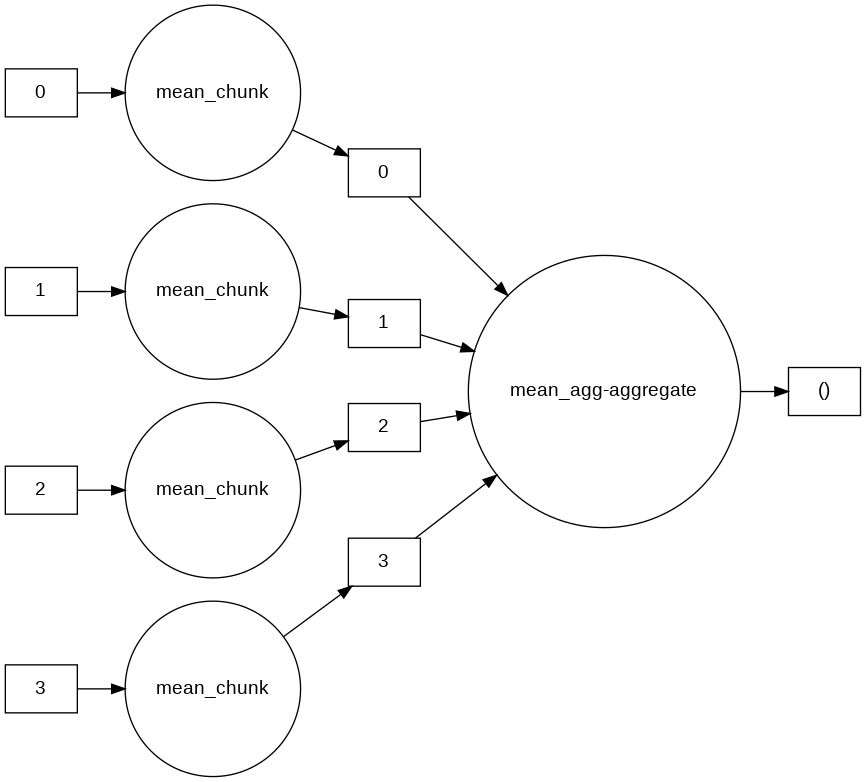

In [14]:
dask_arr_mean.visualize(rankdir="LR")

### Otro ejemplo

In [15]:
x = da.random.random(10, chunks=2)
y = da.random.random(10, chunks=2)

sum_x_y = da.add(x, y)
mean_x_y = da.mean(sum_x_y)

In [16]:
sum_x_y.compute()

array([1.18794603, 0.82240536, 0.79892909, 0.50024625, 0.68539699,
       0.63946621, 1.98365941, 0.85569816, 0.677207  , 1.23413746])

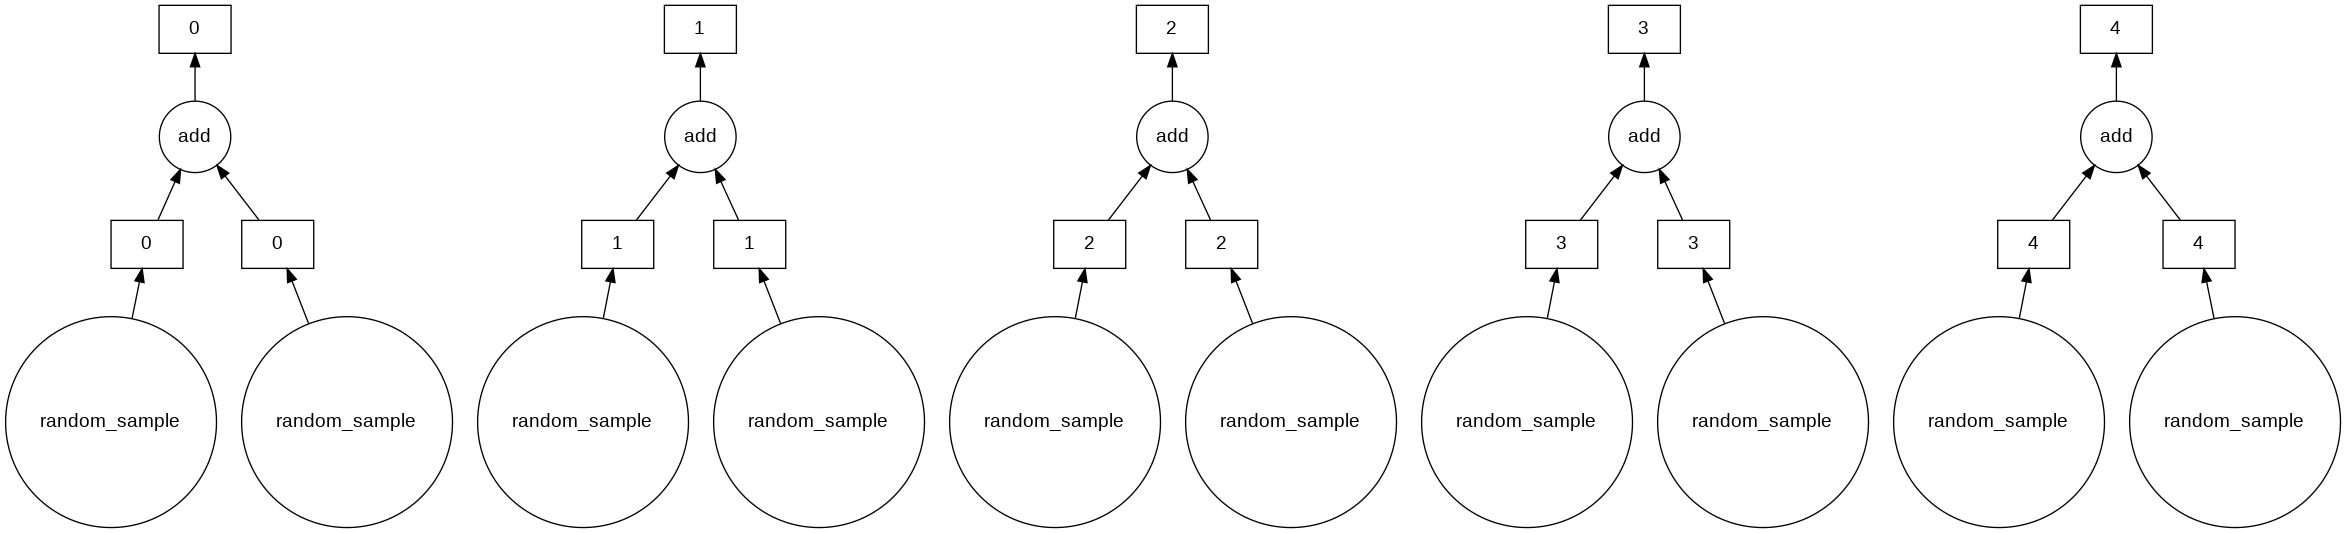

In [17]:
sum_x_y.visualize()

In [18]:
sum_x_y.chunks

((2, 2, 2, 2, 2),)

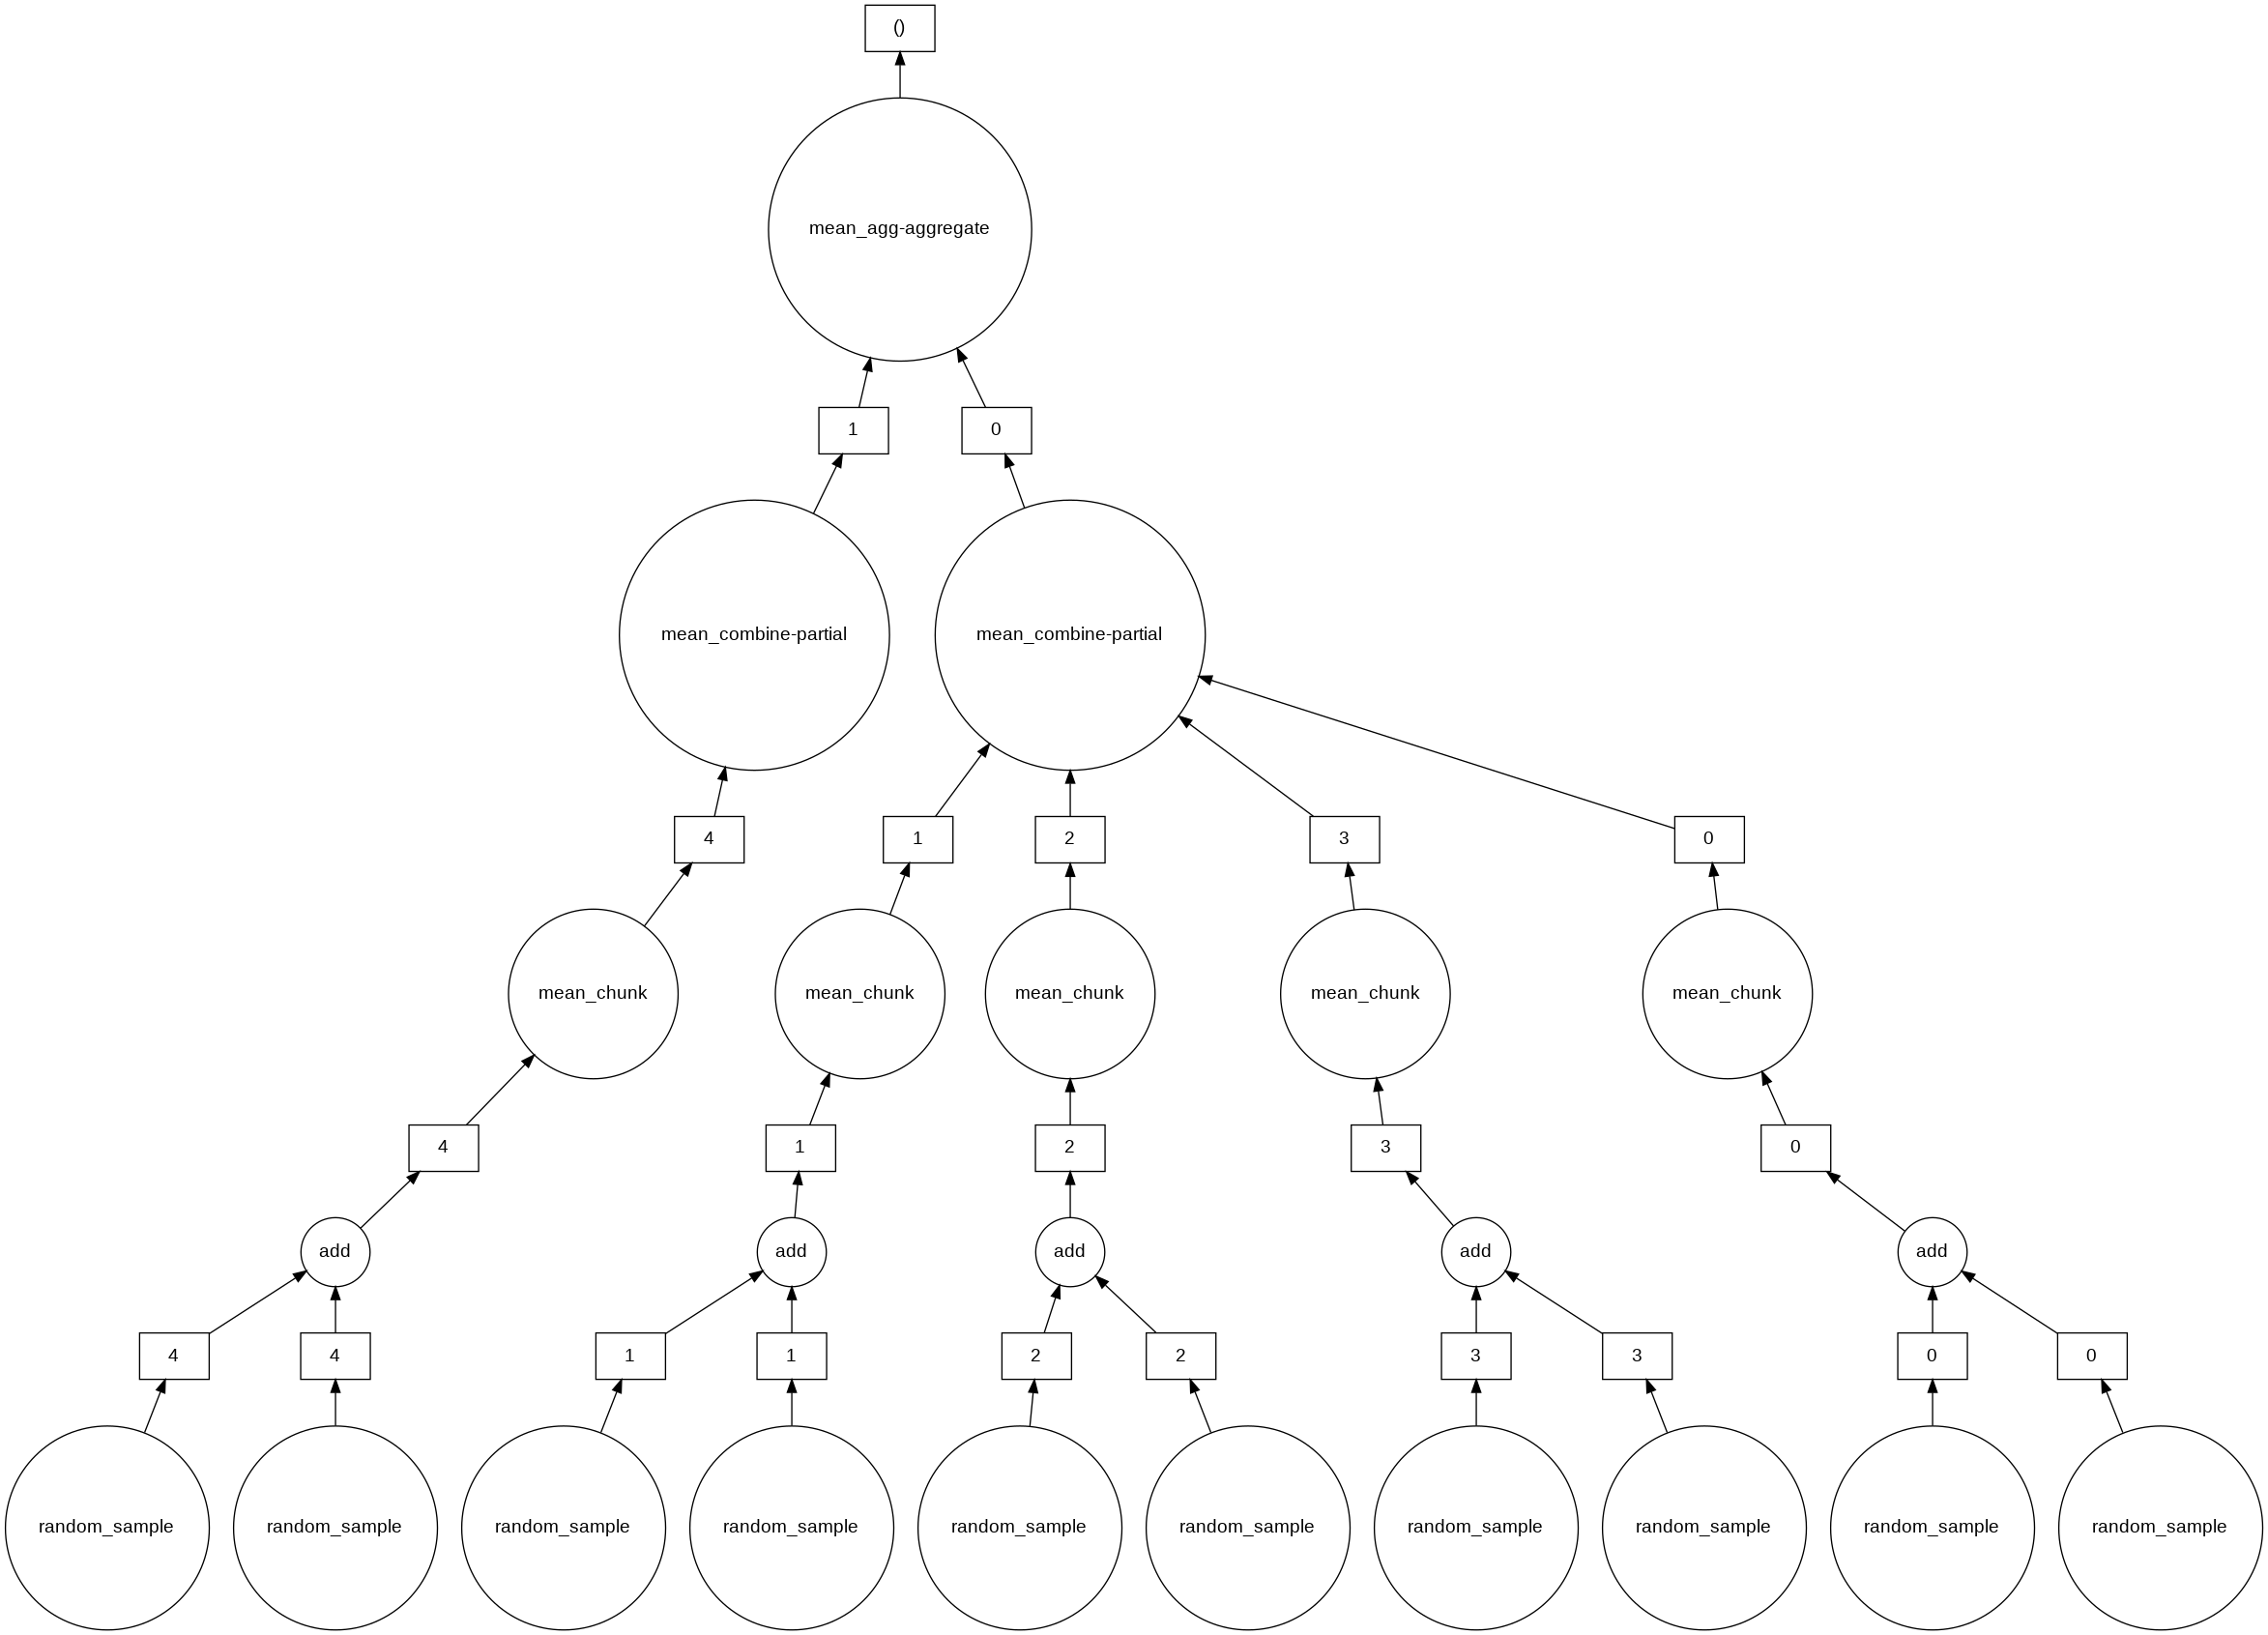

In [19]:
mean_x_y.visualize()

## Ejemplo Out-of-Memory

In [20]:
da_arr_large = da.random.randint(10000, size=(50000, 50000),
                                 chunks=(5000, 1000))   
da_sum_large = da_arr_large.sum()   

numero de bytes con `nbytes` : http://docs.dask.org/en/latest/array-api.html#dask.array.Array.nbytes

In [21]:
da_arr_large.nbytes  

20000000000

Convertimos Bytes a GB

In [22]:
da_arr_large.nbytes/(1024*1024*1024)


18.62645149230957

In [ ]:
da_sum_large.compute()